### Contents  
- import libraries and data  
- filter to UK data only  
- hypothesis  
- reshape  
- regression  
- conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\6.0 Advanced Analyics & Dashboard Design"

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_Flags_3.csv'))

In [6]:
df.head()

,iso_code,continent,location,date,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,handwashing_facilities,human_development_index,...,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,stringency_category,aged_over_65
0,AFG,Asia,Afghanistan,24/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
1,AFG,Asia,Afghanistan,25/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
2,AFG,Asia,Afghanistan,26/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
3,AFG,Asia,Afghanistan,27/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
4,AFG,Asia,Afghanistan,28/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%


### For this analysis I am going to focus on UK data, as it is one of the countries with the most complete data.

In [7]:
df_uk = df[df['location'] == 'United Kingdom']

### UK data cleaning

In [8]:
df_uk.head()

,iso_code,continent,location,date,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,handwashing_facilities,human_development_index,...,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,stringency_category,aged_over_65
67932,GBR,Europe,United Kingdom,31/01/2020,NaN,NaN,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67933,GBR,Europe,United Kingdom,01/02/2020,NaN,NaN,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67934,GBR,Europe,United Kingdom,02/02/2020,NaN,NaN,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67935,GBR,Europe,United Kingdom,03/02/2020,NaN,NaN,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67936,GBR,Europe,United Kingdom,04/02/2020,NaN,NaN,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%


In [10]:
# checking missing values

df_uk.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
new_cases_smoothed_per_million      5
total_deaths_per_million           35
hosp_patients_per_million          62
people_vaccinated_per_hundred     342
handwashing_facilities            396
human_development_index             0
life_expectancy                     0
stringency_index                    3
gdp_per_capita                      0
aged_70_older                       0
aged_65_older                       0
population_density                  0
population                          0
median_age                          0
cardiovasc_death_rate               0
diabetes_prevalence                 0
extreme_poverty                     0
stringency_category                 0
aged_over_65                        0
dtype: int64

In [11]:
# checking duplicates  

dups = df_uk.duplicated()

In [12]:
dups.shape

(396,)

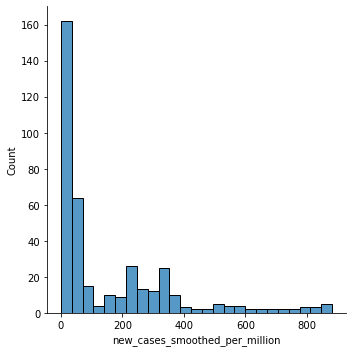

In [13]:
# extreme values check

sns.displot(df_uk['new_cases_smoothed_per_million'], bins=25)

Data is heavily skewed. This is not neccesarily a problem.

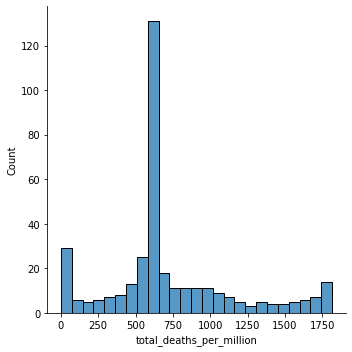

In [14]:
sns.displot(df_uk['total_deaths_per_million'], bins=25)

In [15]:
df_uk['new_cases_smoothed_per_million'].describe()

count    391.000000
mean     157.216095
std      205.027315
min        0.008000
25%       13.895000
50%       58.011000
75%      254.090000
max      881.309000
Name: new_cases_smoothed_per_million, dtype: float64

In [16]:
df_uk['total_deaths_per_million'].describe()

count     361.000000
mean      719.099970
std       433.663152
min         0.015000
25%       563.400000
50%       612.821000
75%       871.284000
max      1814.616000
Name: total_deaths_per_million, dtype: float64

### Scatterplot

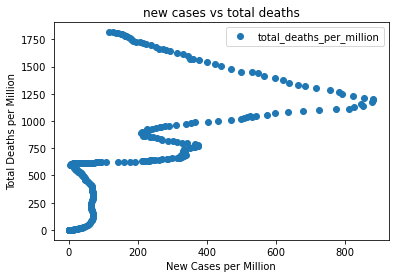

In [18]:
df_uk.plot(x = 'new_cases_smoothed_per_million', y = 'total_deaths_per_million', style='o')
plt.title('new cases vs total deaths')
plt.xlabel('New Cases per Million')
plt.ylabel('Total Deaths per Million')
plt.show()

This is an interesting scatterplot. I think the pattern is being impacted by time.

### Hypothesis  
As new cases rise, total deaths rise by the same degree.

### Reshape

In [19]:
X = df_uk['new_cases_smoothed_per_million'].values.reshape(-1,1)
y = df_uk['total_deaths_per_million'].values.reshape(-1,1)

In [20]:
X

array([[        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [1.90000e-02],
       [1.90000e-02],
       [1.50000e-02],
       [2.30000e-02],
       [2.50000e-02],
       [1.30000e-02],
       [1.50000e-02],
       [1.50000e-02],
       [1.70000e-02],
       [1.90000e-02],
       [1.10000e-02],
       [8.00000e-03],
       [1.10000e-02],
       [8.00000e-03],
       [8.00000e-03],
       [1.10000e-02],
       [1.10000e-02],
       [1.10000e-02],
       [2.10000e-02],
       [2.30000e-02],
       [3.20000e-02],
       [3.60000e-02],
       [4.60000e-02],
       [6.90000e-02],
       [8.00000e-02],
       [1.39000e-01],
       [2.19000e-01],
       [3.26000e-01],
       [4.40000e-01],
       [5.28000e-01],
       [6.69000e-01],
       [7.74000e-01],
       [8.19000e-01],
       [1.04400e+00],
       [1.47300e+00],
       [2.22000e+00],
       [3.14600e+00],
       [3.99000e+00],
       [4.64000e+00],
       [5.45900e+00],
       [6.

In [21]:
y

array([[         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [1.500000e-02],
       [2.900000e-02],
       [2.900000e-02],
       [4.400000e-02],
       [1.030000e-01],
       [1.030000e-01],
       [1.330000e-01],
       [1.470000e-01],
       [4.2

Need to filter out the nan values.

In [31]:
X = X[~np.isnan(X)]

In [32]:
X

array([1.90000e-02, 1.90000e-02, 1.50000e-02, 2.30000e-02, 2.50000e-02,
       1.30000e-02, 1.50000e-02, 1.50000e-02, 1.70000e-02, 1.90000e-02,
       1.10000e-02, 8.00000e-03, 1.10000e-02, 8.00000e-03, 8.00000e-03,
       1.10000e-02, 1.10000e-02, 1.10000e-02, 2.10000e-02, 2.30000e-02,
       3.20000e-02, 3.60000e-02, 4.60000e-02, 6.90000e-02, 8.00000e-02,
       1.39000e-01, 2.19000e-01, 3.26000e-01, 4.40000e-01, 5.28000e-01,
       6.69000e-01, 7.74000e-01, 8.19000e-01, 1.04400e+00, 1.47300e+00,
       2.22000e+00, 3.14600e+00, 3.99000e+00, 4.64000e+00, 5.45900e+00,
       6.44400e+00, 7.51900e+00, 8.76900e+00, 9.98300e+00, 1.16200e+01,
       1.34110e+01, 1.54000e+01, 1.90490e+01, 2.24410e+01, 2.60420e+01,
       3.03790e+01, 3.45680e+01, 3.79940e+01, 4.11590e+01, 4.53220e+01,
       4.98500e+01, 5.46000e+01, 5.83920e+01, 6.20370e+01, 6.46250e+01,
       6.62200e+01, 6.83010e+01, 7.03050e+01, 7.07030e+01, 7.06540e+01,
       6.93620e+01, 6.83940e+01, 6.81600e+01, 6.58230e+01, 6.342

In [33]:
y = y[~np.isnan(y)]

In [35]:
y

array([1.500000e-02, 2.900000e-02, 2.900000e-02, 4.400000e-02,
       1.030000e-01, 1.030000e-01, 1.330000e-01, 1.470000e-01,
       4.270000e-01, 6.330000e-01, 9.720000e-01, 1.223000e+00,
       1.738000e+00, 2.416000e+00, 2.887000e+00, 3.742000e+00,
       4.257000e+00, 5.377000e+00, 7.557000e+00, 1.037000e+01,
       1.305100e+01, 1.729400e+01, 2.159500e+01, 2.473300e+01,
       3.024200e+01, 3.619300e+01, 4.610700e+01, 5.578500e+01,
       6.664100e+01, 7.779200e+01, 8.664500e+01, 9.504200e+01,
       1.113190e+02, 1.265210e+02, 1.429750e+02, 1.595170e+02,
       1.719500e+02, 1.816280e+02, 1.923080e+02, 2.082170e+02,
       2.212390e+02, 2.365580e+02, 2.500220e+02, 2.663440e+02,
       2.727220e+02, 2.812070e+02, 2.992370e+02, 3.118610e+02,
       3.219370e+02, 3.369320e+02, 3.489530e+02, 3.543150e+02,
       3.590730e+02, 3.733760e+02, 3.847330e+02, 3.941020e+02,
       4.044130e+02, 4.130310e+02, 4.167570e+02, 4.207790e+02,
       4.314590e+02, 4.409890e+02, 4.477360e+02, 4.5628

In [36]:
len(y)

361

In [37]:
len(X)

391

In [34]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

ValueError: Found input variables with inconsistent numbers of samples: [391, 361]

The numpy arrays are different lengths because i just removed nan values. Instead I will replace nan values with 0's.

In [38]:
X_2 = df_uk['new_cases_smoothed_per_million'].values.reshape(-1,1)
y_2 = df_uk['total_deaths_per_million'].values.reshape(-1,1)

In [39]:
len(X_2)

396

In [40]:
len(y_2)

396

In [43]:
# replacing nan with 0

np.nan_to_num(X_2)

array([[0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [1.90000e-02],
       [1.90000e-02],
       [1.50000e-02],
       [2.30000e-02],
       [2.50000e-02],
       [1.30000e-02],
       [1.50000e-02],
       [1.50000e-02],
       [1.70000e-02],
       [1.90000e-02],
       [1.10000e-02],
       [8.00000e-03],
       [1.10000e-02],
       [8.00000e-03],
       [8.00000e-03],
       [1.10000e-02],
       [1.10000e-02],
       [1.10000e-02],
       [2.10000e-02],
       [2.30000e-02],
       [3.20000e-02],
       [3.60000e-02],
       [4.60000e-02],
       [6.90000e-02],
       [8.00000e-02],
       [1.39000e-01],
       [2.19000e-01],
       [3.26000e-01],
       [4.40000e-01],
       [5.28000e-01],
       [6.69000e-01],
       [7.74000e-01],
       [8.19000e-01],
       [1.04400e+00],
       [1.47300e+00],
       [2.22000e+00],
       [3.14600e+00],
       [3.99000e+00],
       [4.64000e+00],
       [5.45900e+00],
       [6.

In [44]:
np.nan_to_num(y_2)

array([[0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [1.500000e-02],
       [2.900000e-02],
       [2.900000e-02],
       [4.400000e-02],
       [1.030000e-01],
       [1.030000e-01],
       [1.330000e-01],
       [1.470000e-01],
       [4.2

In [45]:
# split data 2

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0) 

### Regression analysis

In [24]:
regression = LinearRegression()

In [46]:
# fit regression object onto training set

regression.fit(X_2_train, y_2_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

I get a 'value error: Input contains NaN, infinity or a value too large' when trying to fit the regression. I will try removing whole rows rather than replacing NaN with 0's.

In [66]:
# removing entire rows where there are nan values in total deaths column

df_uk_nonan = df_uk[df_uk['total_deaths_per_million'].notnull()]

In [67]:
df_uk_nonan.head()

,iso_code,continent,location,date,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,handwashing_facilities,human_development_index,...,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,stringency_category,aged_over_65
67967,GBR,Europe,United Kingdom,06/03/2020,0.669,0.015,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67968,GBR,Europe,United Kingdom,07/03/2020,0.774,0.029,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67969,GBR,Europe,United Kingdom,08/03/2020,0.819,0.029,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67970,GBR,Europe,United Kingdom,09/03/2020,1.044,0.044,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%
67971,GBR,Europe,United Kingdom,10/03/2020,1.473,0.103,NaN,NaN,NaN,0.932,...,12.527,18.517,272.898,67886004.0,40.8,122.137,4.28,0.2,low stringency,15-20%


In [68]:
# now reshape data in to arrays again

X_3 = df_uk_nonan['new_cases_smoothed_per_million'].values.reshape(-1,1)
y_3 = df_uk_nonan['total_deaths_per_million'].values.reshape(-1,1)

In [69]:
# split data 3

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=0) 

In [70]:
# fit regression object onto training set

regression.fit(X_3_train, y_3_train)

LinearRegression()

In [71]:
# predict the values of y using x

y_predicted = regression.predict(X_3_test)

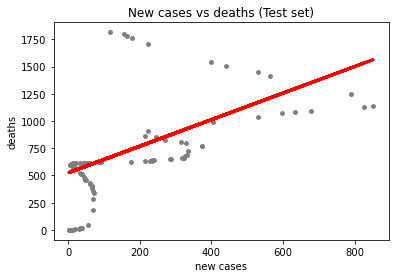

In [72]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_3_test, y_3_test, color='gray', s = 15)
plot_test.plot(X_3_test, y_predicted, color='red', linewidth =3)
plot_test.title('New cases vs deaths (Test set)')
plot_test.xlabel('new cases')
plot_test.ylabel('deaths')
plot_test.show()

The line does not fit very well at all. I do not think this is a very accurate model for describing the impact of new cases on deaths. 

In [73]:
# Objects that contain the model summary statistics.

rmse = mean_squared_error(y_3_test, y_predicted) 
r2 = r2_score(y_3_test, y_predicted)

In [74]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.21899883]]
Mean squared error:  101070.54660125234
R2 score:  0.32037878713836243


In [75]:
# create a df comparing the actual and the predicted values of y

data = pd.DataFrame({'Actual': y_3_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,613.897,564.078651
1,769.525,979.731652
2,281.207,609.544869
3,46.107,590.825923
4,628.730,785.220885
5,619.818,628.859906
6,834.193,849.713237
7,609.757,541.239489
8,594.718,537.466688
9,0.133,528.103558


### Conclusion  
The linear regression model is not a good model for predicting deaths from covid-19 based on new cases of covid-19. There are clearly many other factors at play. The impact of time on the analysis is not adequatley reflected in the regression model I have used. 